In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import random
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
LINK = 'https://passport.yandex.ru/registration/mail?from=mail&origin=home_desktop_ru&retpath=https%3A%2F%2Fmail.yandex.ru%2F&backpath=https%3A%2F%2Fyandex.ru'

In [3]:
driver = webdriver.Chrome("/usr/local/bin/Chromedriver")

driver.get(LINK)

In [4]:
# 
fn = driver.find_element_by_name('firstname')
fn.send_keys('test')

In [5]:
ln = driver.find_element_by_name('lastname')
ln.send_keys('test')

In [6]:
ln = driver.find_element_by_name('login')
log = 'test.test'
rnd = round(random.random(),3)
log = log + str(rnd)
ln.send_keys(log)

In [8]:
print("Создана почта:"+log+"@yandex.ru" )

Создана почта:test.test0.391@yandex.ru


In [9]:
pw = driver.find_element_by_name('password')
pw.send_keys('***')

In [10]:
print("Создан пароль!" )

Создан пароль!


In [11]:
pw2 = driver.find_element_by_name('password_confirm')
pw2.send_keys('***')

In [12]:
import os

from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


wait = WebDriverWait(driver, 10)

a = []
for l in driver.find_elements_by_xpath("//div[@class='toggle-link link_has-no-phone']"):
    l.click()
    a.append(l.get_attribute("textContent"))
a

['У\xa0меня нет телефона']

In [13]:
import os

from selenium import webdriver

wait = WebDriverWait(driver, 15)

cl = driver.find_element_by_xpath("//div[@class='toggle-link link_has-no-phone']")
 
from selenium.webdriver.common.action_chains import ActionChains

el = cl.find_element_by_xpath("//*[@id=\"root\"]/div/div[2]/div/main/div/div/div/form/div[3]/div/div[2]/div/div[1]/span")
print(el.get_attribute("textContent"))
ActionChains(driver).move_to_element(el).click(el).perform() 


У меня нет телефона


In [14]:
wait = WebDriverWait(driver, 15)
ha = driver.find_element_by_name('hint_answer')
ha.send_keys('qwerty')

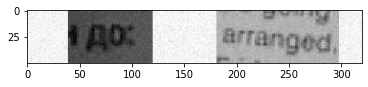

In [15]:
img = driver.find_element_by_class_name('captcha__image')
src = img.get_attribute('src')

# download the image
import requests

out = requests.get(src).content
file = open("/usr/local/bin/captcha.png", "wb")  # write captcha on disk
file.write(out)
file.close()

image = np.asarray(Image.open("/usr/local/bin/captcha.png").convert('RGB')) # converting png to an array
plt.imshow(image)


In [16]:
import requests
import asyncio
import base64
from python_rucaptcha import ImageCaptcha, CallbackClient, RuCaptchaControl

RUCAPTCHA_KEY = "***"
user_answer_const = ImageCaptcha.ImageCaptcha(
    rucaptcha_key=RUCAPTCHA_KEY, img_path="test_files", img_clearing=False, save_format="const"
).captcha_handler(captcha_link=str(src))
print(user_answer_const['captchaSolve'])

до: arranged,


In [17]:
ha = driver.find_element_by_name('captcha')
ha.send_keys(str(user_answer_const['captchaSolve']))

In [18]:
bt = driver.find_element_by_xpath('//*[@id=\"root\"]/div/div[2]/div/main/div/div/div/form/div[4]/span')
bt.click()

In [19]:
driver.implicitly_wait(10) # seconds

In [20]:
bt2 = driver.find_element_by_xpath('//*[@id=\"root\"]/div/div[1]/div[2]/main/div/div/div/div[3]/span/a')
bt2.click()

In [21]:
driver.close()

In [22]:
print("Создана почта: "+log+"@yandex.ru" )
print("Создан пароль: *********!")

Создана почта: test.test0.391@yandex.ru
Создан пароль: *********!
